# Heart Disease UCI dataset Analysis
<a href="https://www.kaggle.com/ronitf/heart-disease-uci">GET HERE</a>

-----------------

### What types of data ? 

**Size :** 303 values, 14 columns

**Target column :** data["target"]

**Column types :** 13 features + 1 target


| Name   | Type   |
| :----: | :----: |
|age     | int64  |
|sex     | int64  |
|cp      | int64  |
|trestbps| int64  |
|chol	 | int64  |
|fbs	 | int64  |
|restecg | int64  |
|thalach | int64  |
|exang 	 | int64  |
|oldpeak | float64|
|slope 	 | int64  |
|ca 	 | int64  |
|thal    | int64  |
|target|int64|

**NaN  :** 0 null values


**Attributes information** : 

   * **sex** = 1 : male; 0 : female
   * **cp** = The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
   * **trestbps** = resting blood pressure
   * **chol** = serum cholestoral in mg/dl
   * **fbs** = fasting blood sugar  > 120 mg/dl : (1 = true; 0 = false) 
   * **restecg** = resting electrocardiographic results (values 0,1,2)
   * **thalach** = maximum heart rate achieved
   * **exang** = exercise induced angina
   * **oldpeak** = ST depression induced by exercise relative to rest
   * **slope** = the slope of the peak exercise ST segment
   * **ca** = number of major vessels (0-3) colored by flourosopy
   * **thal**: is a blood disorder called thalassemia, 3 = normal; 6 = fixed defect; 7 = reversable defect


-----------------

### Data analysis 

* **Univariate** : 

    * Target -> positive = 165, negative = 138. The target is nicely balanced
    * Age    -> global mean = 54.3 ; women mean: 55.677083 ; man mean: 53.758454
    * Chest pain type -> most of the data are type 0, can be usefull to try to correlate this one with target
    * thalac -> mean = 149 heart beats per minutes; max = 202

* **Bivariate** : 
    * Create subset of data : Positive / negative , Blood (column :'trestbps','chol', 'thal', 'fbs) 
    * Corr matrix : max corr between target and cp (0.43) , target thalach (0,42)
    * Age / Target
    * Sex / Target
    * Chest type / Target : 
    * blood / target : thal = 5 -> the highest positive result    
    * Blood / Blood : 
    * Blood / Age : Blood is not correlate with Age (max trestbps = 0.279351)


### Hypothesis test
* H0 = Chess type seems to play a role of Heart disease

* H1 = thalach seems to be correlate with heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/anthonycoplo/Documents/Perso/DATA SCIENCE PROJET/data/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.shape

(303, 14)

### Types

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:ylabel='None'>

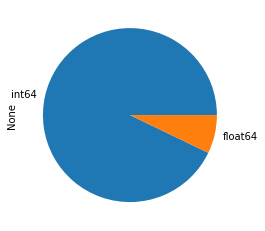

In [6]:
data.dtypes.value_counts().plot.pie()

### NaN

In [7]:
(data.isna().sum()/data.shape[0]).sort_values(ascending = True)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

### Describe data

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate 

#### Target

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### distribution plot of the features

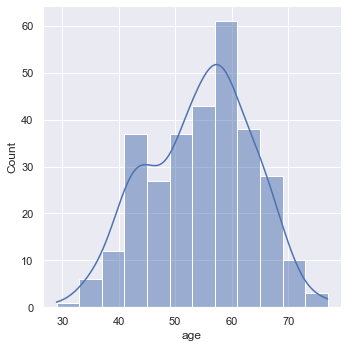

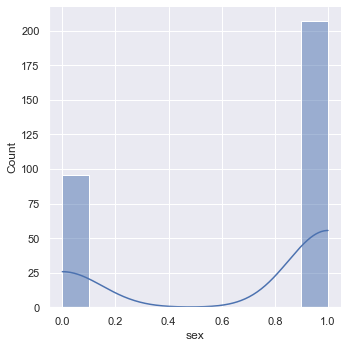

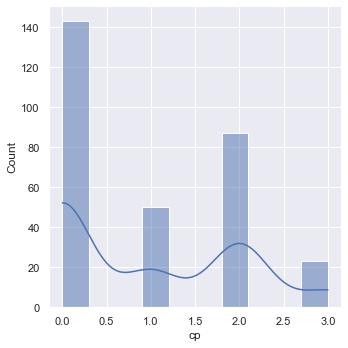

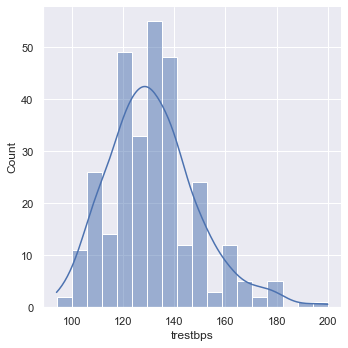

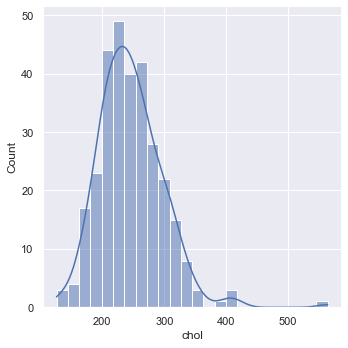

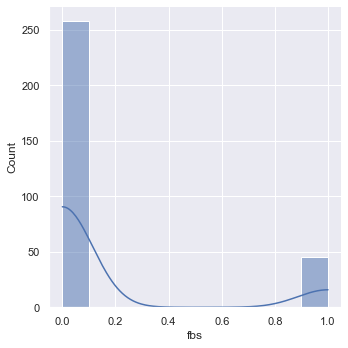

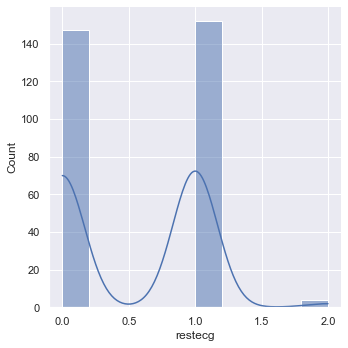

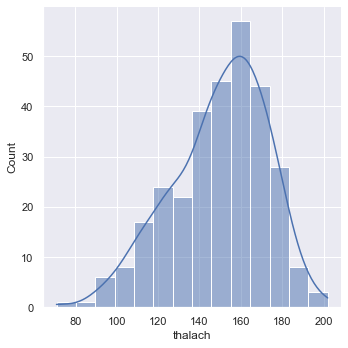

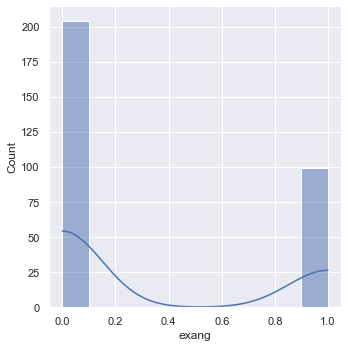

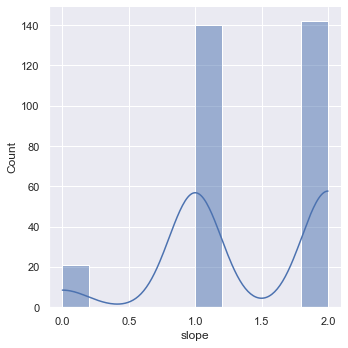

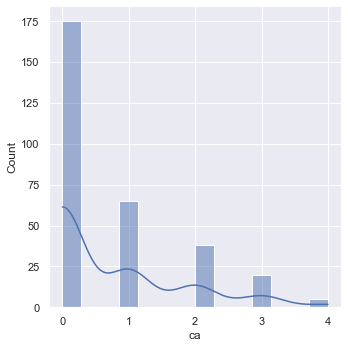

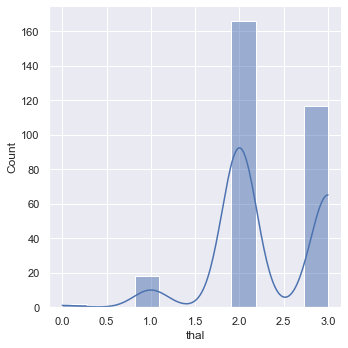

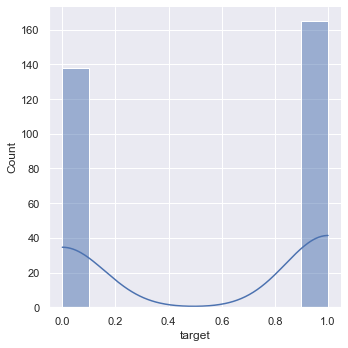

In [10]:
for col in data.select_dtypes('int64'):
    sns.set()
    sns.displot(data[col], kde =True)

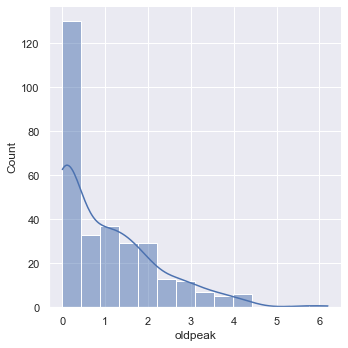

In [11]:
sns.displot(data['oldpeak'], kde= True)

<AxesSubplot:xlabel='sex', ylabel='age'>

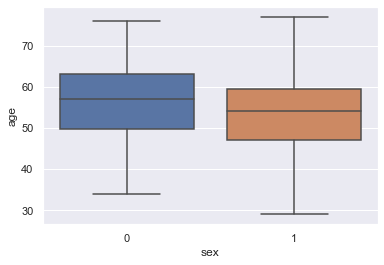

In [12]:
sns.boxplot(x = "sex", y = "age", data = data)

sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

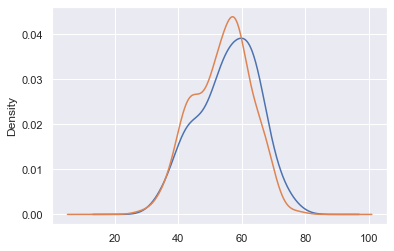

In [13]:
data.groupby('sex').age.plot(kind='kde')

In [14]:
data[["sex", "age"]].groupby("sex").mean()

,age
sex,
0,55.677083
1,53.758454


## Create Subset

### Negative / positive subset

In [15]:
# positive results
positive_result = data[data['target'] == 1]

# negative results
negative_result = data[data['target'] == 0]

In [16]:
blood = data[['trestbps','chol', 'thal','fbs']]
blood

,trestbps,chol,thal,fbs
0,145,233,1,1
1,130,250,2,0
2,130,204,2,0
3,120,236,2,0
4,120,354,2,0
...,...,...,...,...
298,140,241,3,0
299,110,264,3,0
300,144,193,3,1
301,130,131,3,0


## Bivariate / multi Analysis

#### Create the pair plot correlation matrix

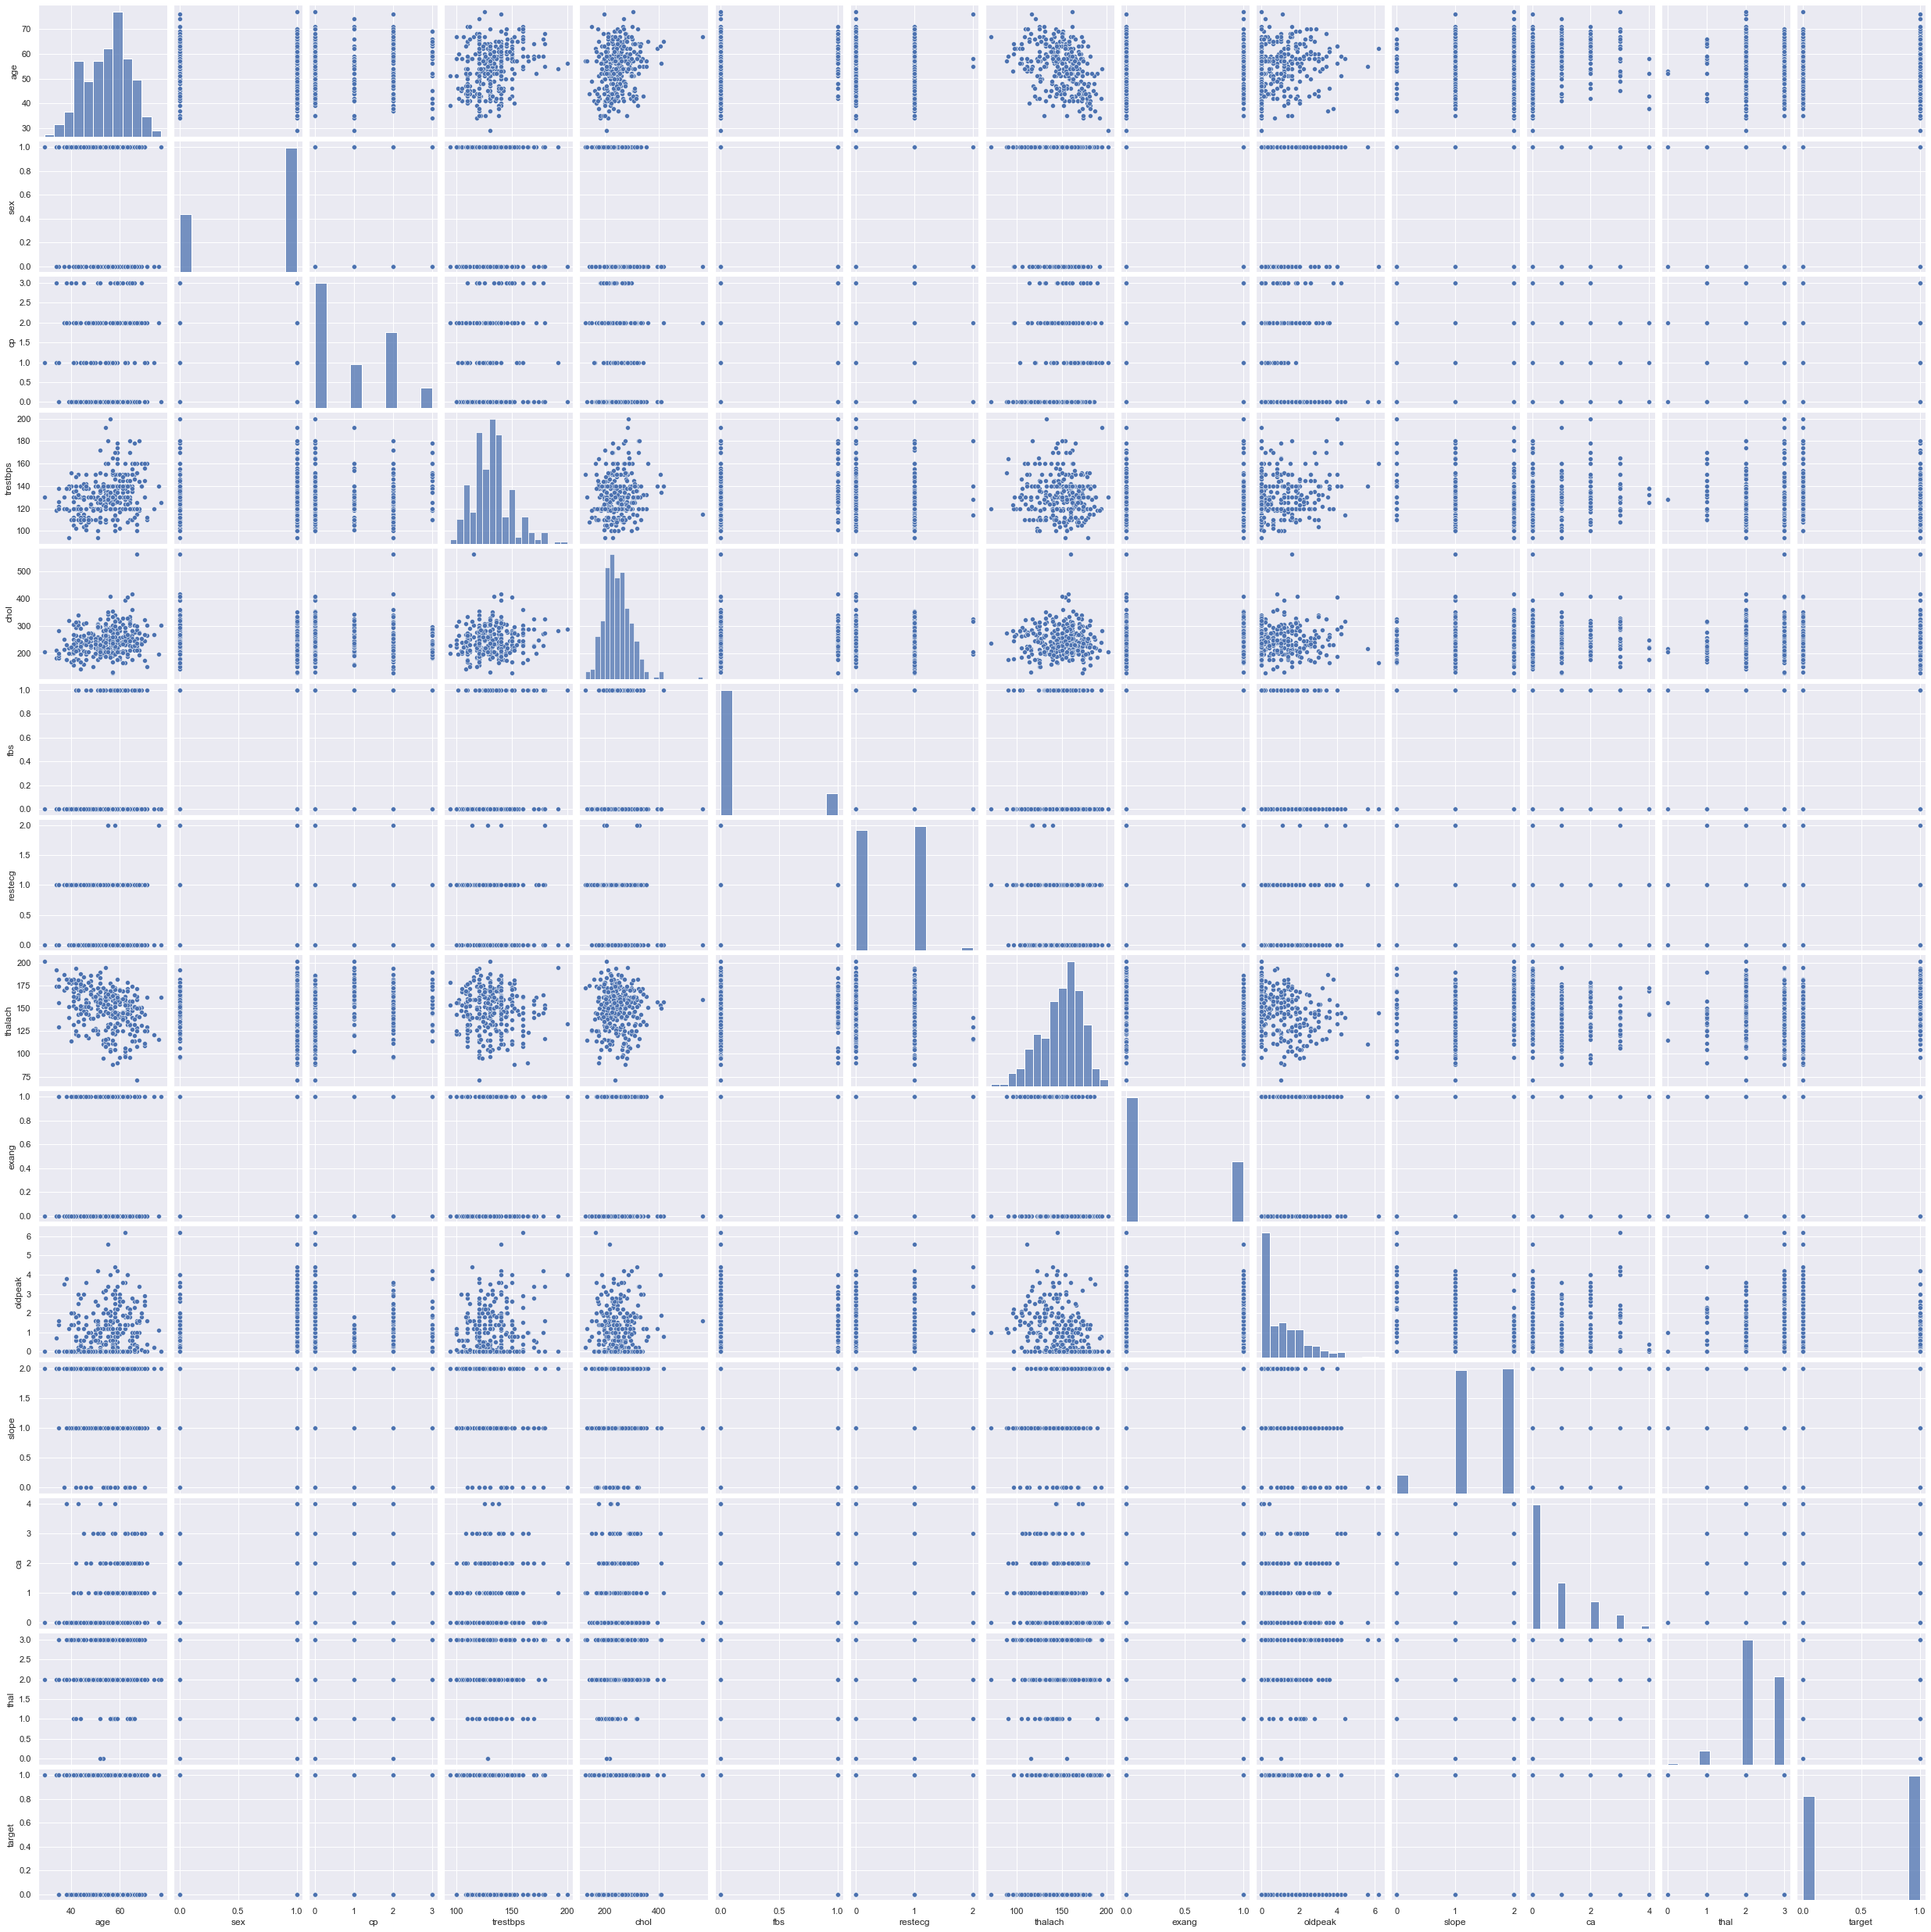

In [17]:
sns.pairplot(data)

<AxesSubplot:>

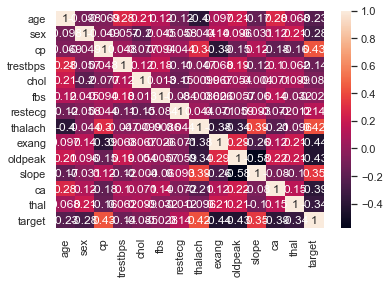

In [18]:
data_corr = data.corr()
sns.heatmap(data_corr, annot = True)

### Sexe / target

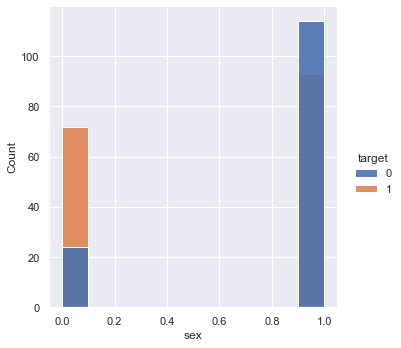

In [19]:
sns.displot(data, x = 'sex', hue='target', alpha = 0.9)

### Age / Target

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

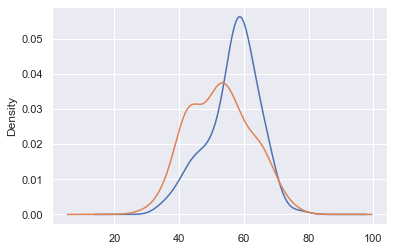

In [20]:
data.groupby('target').age.plot(kind='kde')

<AxesSubplot:xlabel='age', ylabel='count'>

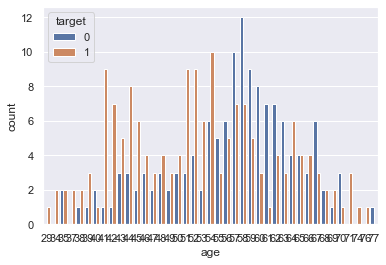

In [21]:
sns.countplot(x="age", hue="target", data=data)

### Chest value / Target

#### Chest 0 / target value subset

In [22]:
cp_zero_pos_target = len(data[(data['cp'] == 0) & (data['target'] == 1)])
cp_zero_neg_target = len(data[(data['cp'] == 0) & (data['target'] == 0)])

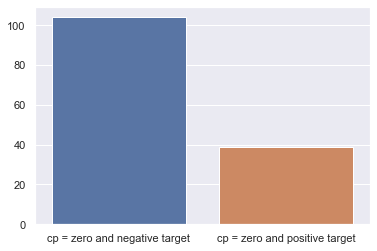

In [23]:
sns.barplot(x = ['cp = zero and negative target', 'cp = zero and positive target'], 
            y = [cp_zero_neg_target, cp_zero_pos_target])
plt.show()

#### Chest 1 / target value subset

In [24]:
cp_one_pos_target = len(data[(data['cp'] == 1) & (data['target'] == 1)])
cp_one_neg_target = len(data[(data['cp'] == 1) & (data['target'] == 0)])

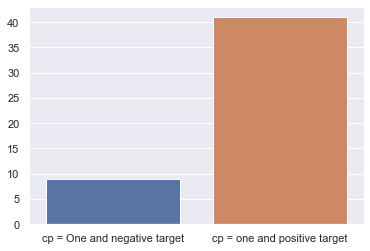

In [25]:
sns.barplot(x = ['cp = One and negative target', 'cp = one and positive target'], 
            y = [cp_one_neg_target, cp_one_pos_target])
plt.show()

#### Chest 2 / target value subset

In [26]:
cp_two_pos_target = len(data[(data['cp'] == 2) & (data['target'] == 1)])
cp_two_neg_target = len(data[(data['cp'] == 2) & (data['target'] == 0)])

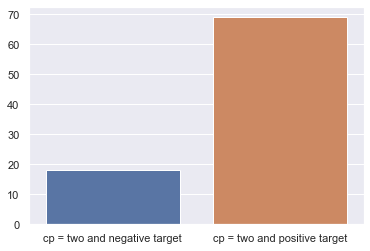

In [27]:
sns.barplot(x = ['cp = two and negative target', 'cp = two and positive target'], 
            y = [cp_two_neg_target, cp_two_pos_target])
plt.show()

#### Chest 3 / target value subset

In [28]:
cp_three_pos_target = len(data[(data['cp'] == 3) & (data['target'] == 1)])
cp_three_neg_target = len(data[(data['cp'] == 3) & (data['target'] == 0)])

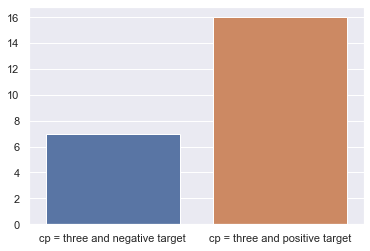

In [29]:
sns.barplot(x = ['cp = three and negative target', 'cp = three and positive target'], 
            y = [cp_three_neg_target, cp_three_pos_target])
plt.show()

### Blood / Target

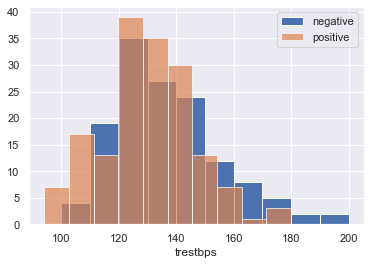

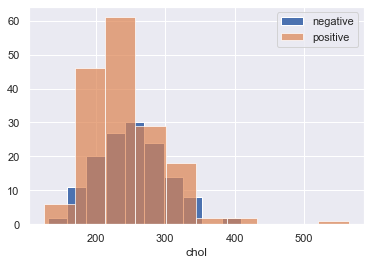

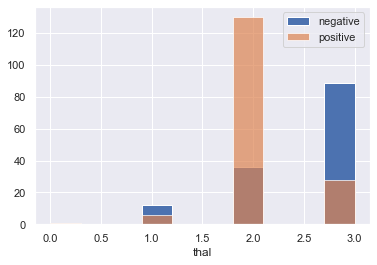

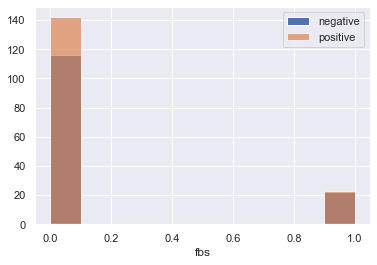

In [30]:
for col in blood:
    plt.figure()
    negative_result[col].hist(label = "negative")
    positive_result[col].hist(label = "positive", alpha = 0.7)
    plt.legend()
    plt.xlabel(col)

### THALCH (maximum heart rate achieved) / Target   

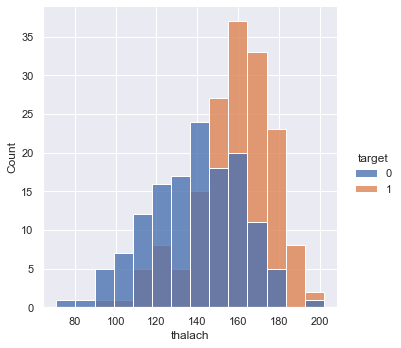

In [31]:
sns.displot(data, x='thalach', hue='target', alpha = 0.8)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: thalach, dtype: object

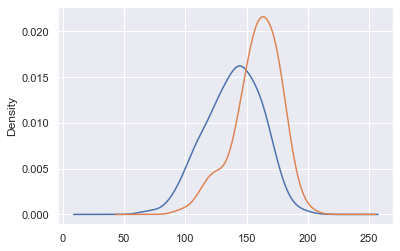

In [32]:
data.groupby('target').thalach.plot(kind='kde')

## Blood / Blood 

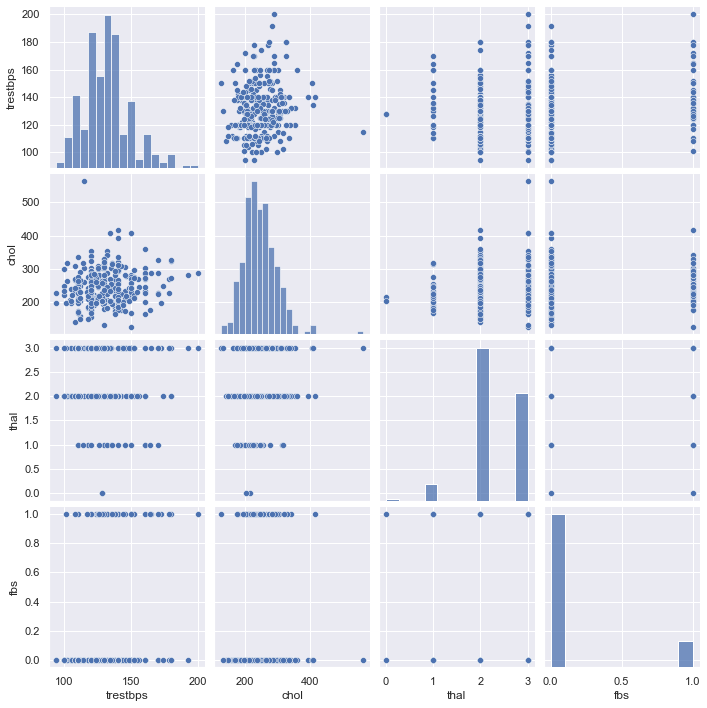

In [33]:
sns.pairplot(blood)

### Blood / Age

<Figure size 432x288 with 0 Axes>

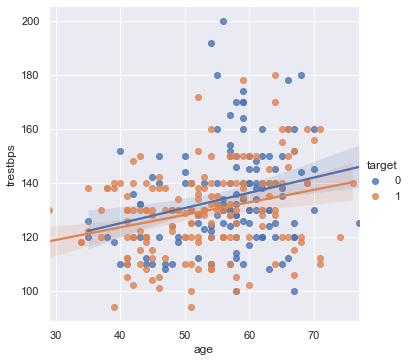

<Figure size 432x288 with 0 Axes>

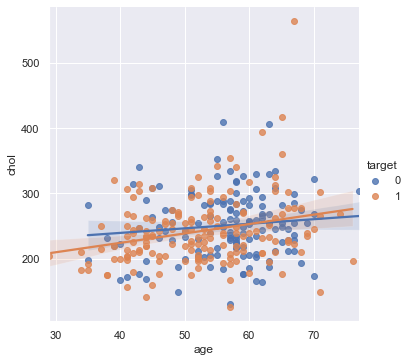

<Figure size 432x288 with 0 Axes>

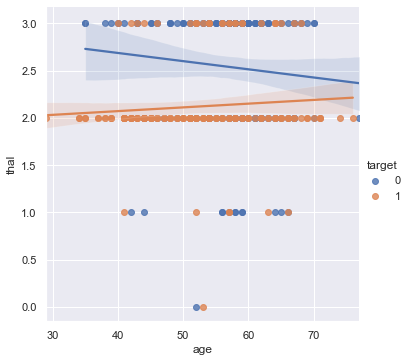

<Figure size 432x288 with 0 Axes>

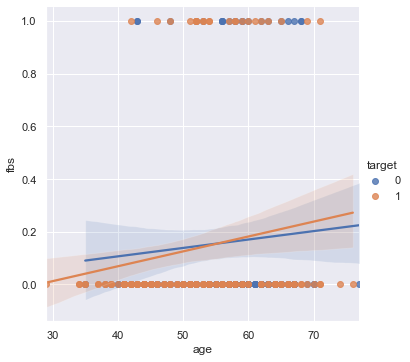

In [34]:
for col in blood:
    plt.figure()
    sns.lmplot(x="age", y=col, hue="target", data=data)

In [35]:
data.corr()["age"].sort_values()

thalach    -0.398522
target     -0.225439
slope      -0.168814
restecg    -0.116211
sex        -0.098447
cp         -0.068653
thal        0.068001
exang       0.096801
fbs         0.121308
oldpeak     0.210013
chol        0.213678
ca          0.276326
trestbps    0.279351
age         1.000000
Name: age, dtype: float64

## Test hypothesis

In [36]:
from scipy.stats import ttest_ind

check class (must be nicely balanced), if is not we can select a sample of class with the sample() function

In [37]:
positive_result.shape

(165, 14)

In [38]:
negative_result.shape

(138, 14)

#### t_test function

In [40]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(negative_result[col], positive_result[col])
    if p < alpha:
        return "H0 rejected"
    else:
        return 0

In [42]:
for col in data:
    print(f'{col :-<30} {t_test(col)}')

age--------------------------- H0 rejected
sex--------------------------- H0 rejected
cp---------------------------- H0 rejected
trestbps---------------------- H0 rejected
chol-------------------------- 0
fbs--------------------------- 0
restecg----------------------- H0 rejected
thalach----------------------- H0 rejected
exang------------------------- H0 rejected
oldpeak----------------------- H0 rejected
slope------------------------- H0 rejected
ca---------------------------- H0 rejected
thal-------------------------- H0 rejected
target------------------------ H0 rejected
